### Part 1 : EDA and data preprocessing

In [1]:
! pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import pandas as pd
#import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

In [2]:
# Reading of dataset

datawal=pd.read_csv("Walmart_Store_sales.csv") 
datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
# Basic statistics

# -> CPI ("Consumer price index") : This index measures the change in prices for the essential goods 
# and services that the least wealthy in our society must consume, such as rent, food and energy.

print("------------------------")
print("Basics statistics: ")
data_desc = datawal.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

print("details of features : ")
datawal.info()
print("------------------------")


------------------------
Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


details of features : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
------------------------


In [4]:
# Drop rows with Nan in Date column and HolidayFlag

datawal = datawal[datawal['Date'].notna() & datawal['Holiday_Flag'].notna()] 
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [5]:
# Drop rows without "y" column (Weekly_sales)

datawal = datawal[datawal['Weekly_Sales'].notna()] 
datawal


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [6]:
# Convert date in datetime object

datawal['Date'] = pd.to_datetime(datawal['Date'])  
datawal.info()

# Confirmation of Dtype for "Date" feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         109 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  109 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           100 non-null    float64       
 7   Unemployment  98 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.7 KB


/tmp/ipykernel_56/718696210.py:3: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_56/718696210.py:3: UserWarning: Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_56/718696210.py:3: UserWarning: Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_56/718696210.py:3: UserWarning: Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_56/718696210.py:3: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_da

In [7]:
#Create 4 columns for splitting date

datawal['year'] = datawal['Date'].dt.year    
datawal['month'] = datawal['Date'].dt.month
datawal['day'] = datawal['Date'].dt.day
datawal['weekday'] = datawal['Date'].dt.weekday
datawal

/tmp/ipykernel_56/233583488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['year'] = datawal['Date'].dt.year
/tmp/ipykernel_56/233583488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['month'] = datawal['Date'].dt.month
/tmp/ipykernel_56/233583488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [8]:
# Check of missing values

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     10.091743
Fuel_Price      10.091743
CPI              8.256881
Unemployment    10.091743
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='Unemployment'>

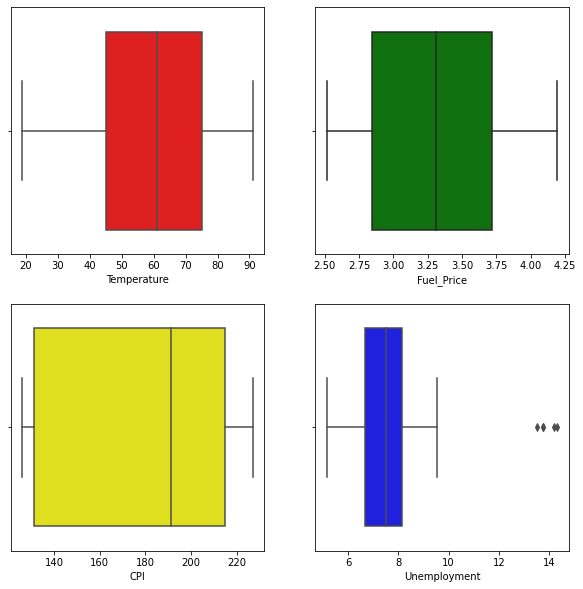

In [9]:
# Detect outliers for Temperature, Fuel_price, CPI and Unemployment features
# There are outliers for the feature "Unemployment". We will check and remove them in the next step

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(datawal['Temperature'],color="red") 
plt.subplot(222)
sns.boxplot(datawal['Fuel_Price'],color="green")
plt.subplot(223)
sns.boxplot(datawal['CPI'],color="yellow")
plt.subplot (224)
sns.boxplot(datawal['Unemployment'],color="blue")

In [10]:
#cleaning of outliers

datawal['Unemployment'].mean()

7.719989795918366

In [11]:
datawal["Unemployment"].std()*3

5.171528481416763

In [12]:
upper_bound = datawal["Unemployment"].mean()+datawal["Unemployment"].std()*3
upper_bound

12.891518277335129

In [13]:
lower_bound = datawal["Unemployment"].mean()-datawal["Unemployment"].std()*3
lower_bound

2.548461314501603

In [14]:
mask = (datawal["Unemployment"] < upper_bound) & (datawal["Unemployment"] > lower_bound)
mask

1       True
4       True
5       True
6       True
7       True
       ...  
144     True
145     True
147    False
148    False
149     True
Name: Unemployment, Length: 109, dtype: bool

In [15]:
clean_datawal = datawal.loc[mask, :]  
clean_datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4


In [16]:
# Replacing missing values by "mean" method 

clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
clean_datawal['CPI'].fillna(value=clean_datawal['CPI'].mean(), inplace=True)
clean_datawal['Unemployment'].fillna(value=clean_datawal['Unemployment'].mean(), inplace=True)

/tmp/ipykernel_56/296008314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
/tmp/ipykernel_56/296008314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
/tmp/ipykernel_56/296008314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['

In [17]:
# Check if ok about "fillna"

print("Percentage of missing values: ")  
display(100*clean_datawal.isnull().sum()/clean_datawal.shape[0])
print()

Percentage of missing values: 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
dtype: float64

In [18]:
clean_datawal.shape

# it remains 93 rows for preprocessing

(93, 12)

In [19]:
# Reorganisation of columns before EDA
# Reminder Y : Weekly_Sales

clean_datawal = clean_datawal[['Store',  
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','year',
 'month',
 'day',
 'weekday','Weekly_Sales']]

clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
1,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
4,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
5,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
6,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
7,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
142,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
143,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
144,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
145,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


In [20]:
# Reinitialisate index first column

clean_datawal = clean_datawal.reset_index(drop=True)
clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
0,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
1,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
2,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
3,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
4,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
89,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
90,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
91,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


<AxesSubplot:>

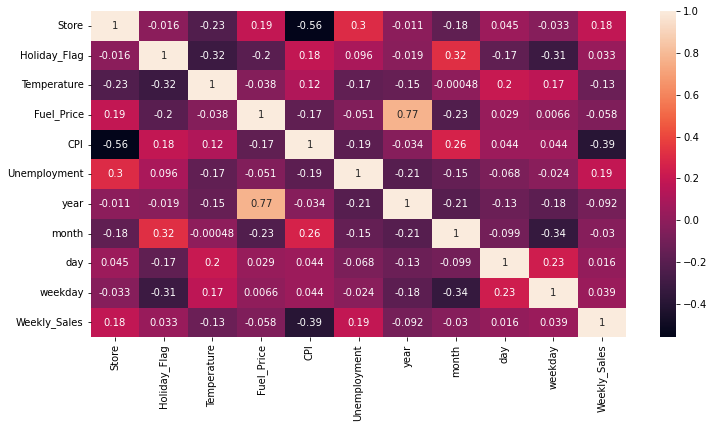

In [21]:
# Heatmap + some visualizations to check coorelations

corr = clean_datawal.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

In [22]:
# Store is a categorical value

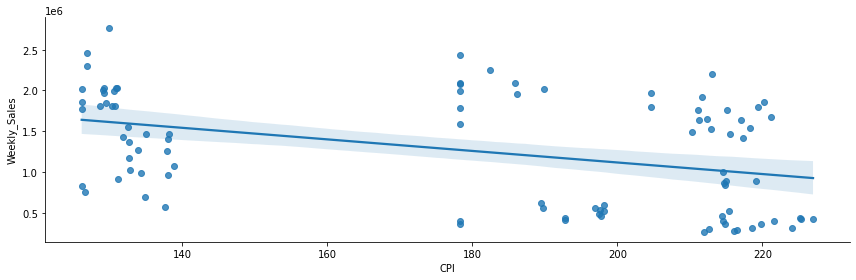

In [23]:
sns.lmplot(x="CPI", y="Weekly_Sales", data=clean_datawal, height=4,aspect=3)

# The more CPI increases, the more weekly sales decreases (coeff -0,39)

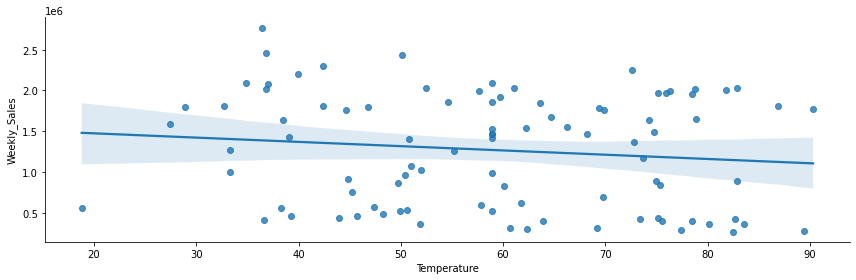

In [24]:
sns.lmplot(x="Temperature", y="Weekly_Sales", data=clean_datawal, height=4,aspect=3)

# The more Temperature increases, the more weekly sales decreases (coeff -0,13)
# It is not a strong coorelation and the impact is limited 

#### --> Sales Increases when Unemployment increases too but slightly

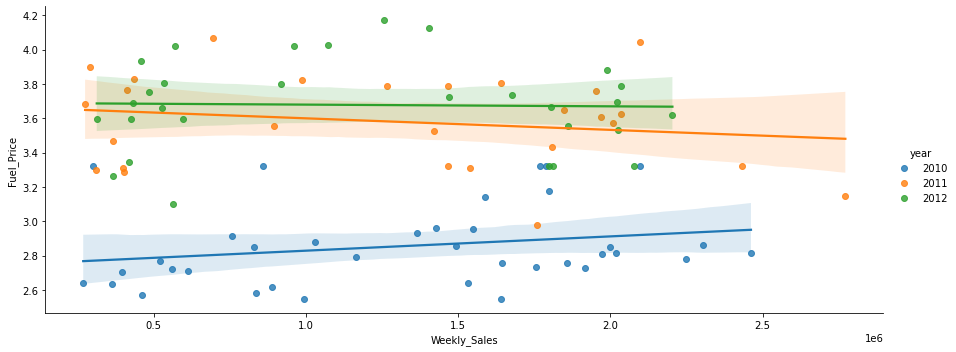

In [25]:
sns.lmplot(x="Weekly_Sales", y="Fuel_Price", data=clean_datawal,hue="year", height=5,aspect=2.5)

# Fuel price has not relly impact on sales each year 

### Preprocessing

In [26]:
# Remove date columns

useless_cols = ['year', 'month', 'day', 'weekday']

print("Dropping useless columns...")
predatawal = clean_datawal.drop(useless_cols, axis=1)
print("...Done.")
print(predatawal.head())

Dropping useless columns...
...Done.
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   13.0           0.0    42.380000       3.435  128.616064         7.470   
1    6.0           0.0    78.890000       2.759  212.412888         7.092   
2    4.0           0.0    58.965647       2.756  126.160226         7.896   
3   15.0           0.0    69.800000       4.069  134.855161         7.658   
4   20.0           0.0    39.930000       3.617  213.023622         6.961   

   Weekly_Sales  
0    1807545.43  
1    1644470.66  
2    1857533.70  
3     695396.19  
4    2203523.20  


In [27]:
#predatawal[['Store']] = predatawal[['Store']].astype(str)
#predatawal.info()

In [28]:
# separate X from Y features 
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = predatawal.loc[:,target_name]
X = predatawal.loc[:,[c for c in predatawal.columns if c!=target_name]] # Keeping all columns
print("...Done.")
print(Y.head())
print()
print(X.head())
print()



Separating labels from features...
...Done.
0    1807545.43
1    1644470.66
2    1857533.70
3     695396.19
4    2203523.20
Name: Weekly_Sales, dtype: float64

   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0   13.0           0.0    42.380000       3.435  128.616064         7.470
1    6.0           0.0    78.890000       2.759  212.412888         7.092
2    4.0           0.0    58.965647       2.756  126.160226         7.896
3   15.0           0.0    69.800000       4.069  134.855161         7.658
4   20.0           0.0    39.930000       3.617  213.023622         6.961



In [29]:
pd.DataFrame(predatawal)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,13.0,0.0,42.380000,3.435,128.616064,7.470,1807545.43
1,6.0,0.0,78.890000,2.759,212.412888,7.092,1644470.66
2,4.0,0.0,58.965647,2.756,126.160226,7.896,1857533.70
3,15.0,0.0,69.800000,4.069,134.855161,7.658,695396.19
4,20.0,0.0,39.930000,3.617,213.023622,6.961,2203523.20
...,...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197,403342.40
89,3.0,0.0,78.530000,2.705,214.495838,7.343,396968.80
90,3.0,0.0,73.440000,3.594,226.968844,6.034,424513.08
91,14.0,0.0,72.620000,2.780,182.442420,8.899,2248645.59


In [30]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 13.           0.          42.38         3.435      128.6160645
    7.47      ]
 [  6.           0.          78.89         2.759      212.412888
    7.092     ]
 [  4.           0.          58.96564706   2.756      126.1602258
    7.896     ]
 [ 15.           0.          69.8          4.069      134.8551613
    7.658     ]
 [ 20.           0.          39.93         3.617      213.0236225
    6.961     ]]

[1807545.43, 1644470.66, 1857533.7, 695396.19, 2203523.2]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)  #Split between train set and test set 
print("...split done !")


...split done !


In [32]:
# Create pipeline for numeric features
numeric_features = [2, 3, 4, 5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler(with_mean=False))
])

In [33]:
# Create pipeline for categorical features
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)) # first column will be dropped to avoid creating correlations between features
    ])


In [34]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[ 19.           0.          55.2          4.17       137.9230667
    8.15      ]
 [ 18.           0.          58.96564706   3.823      134.2784667
    8.975     ]
 [ 14.           0.          36.85         3.695      189.8424834
    8.424     ]
 [ 19.           0.          33.26         3.789      133.9587419
    7.771     ]
 [ 18.           0.          52.02         2.878      132.7633548
    9.331     ]]
...Done.
[[3.41051093 9.16289548 3.62015714 8.64679171 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [3.64316999 8.40041952 3.52449493 9.52208044 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [2.27676318 8.11916038 4.9829201  8.93749366 0.         0.
  0.         0.         

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Part 2 : Baseline model (linear regression)

In [35]:
# To call regression model and train the model

regressorlin = LinearRegression()
regressorlin.fit(X_train, Y_train)
print("...Done.")

...Done.


In [36]:
# Predictions on training and test set

print("Predictions on training set...")
Y_train_pred = regressorlin.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

print("Predictions on test set...")
Y_test_pred = regressorlin.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on training set...
...Done.
[1295990.25055707 1052298.9822946  2135174.66094244 1426165.4398215
 1191475.71387517]

Predictions on test set...
...Done.
[2290887.40082993  474639.65617579 1730007.10583804 1316094.96445947
  213591.92110229]



In [37]:
# Print R^2 scores

print("R2 score on training set is : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set is : ", r2_score(Y_test, Y_test_pred))

R2 score on training set is :  0.9613220182366369
R2 score on test set is :  0.7904324766008736


In [38]:
regressorlin.coef_

array([  -49521.66260114,   -63522.58730239,    34262.27457102,
         -33401.51317809,   383769.91574349, -1190127.10426571,
         713972.75846274, -1278574.6683447 ,   -44285.99552319,
       -1052052.15793996,  -755039.57805658,   480844.07108043,
         248974.86371641,   455478.27346165,   583100.68962331,
        -777510.66958452, -1105981.4262126 ,  -764728.91638241,
        -344746.89712305,   -96656.42008025,   358439.54310806,
        -129837.07864347])

In [39]:
#Analyze the values of the model's coefficients to know what features are important for the prediction


In [40]:
coeff = pd.DataFrame(data = regressorlin.coef_.transpose(), columns=["coefficients"])
coeff = np.round(coeff)
coeff.sort_values("coefficients", ascending=False)

,coefficients
6,713973.0
14,583101.0
11,480844.0
13,455478.0
4,383770.0
20,358440.0
12,248975.0
2,34262.0
3,-33402.0
8,-44286.0


In [ ]:
#coef = pd.DataFrame()
#coef['features'] = X.columns
#coef['coef_linear_regressor'] = linear_regressor.coef_
#coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_
#coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_
#coef

In [ ]:
# The moste relevant features are column 6 (to be reviewed)
# there is a possibility of high bias if we have limited data, 
#because we would miss some information about the data which we have not used for training. 
#If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.


### Part 3 : Fight overfitting

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [42]:
# To call regression model and train the model

regressorrid = Ridge()
regressorrid.fit(X_train, Y_train)
print("...Done.")

...Done.


In [43]:
# Predictions on training and test set

print("Predictions on training set...")
Y_train_pred = regressorrid.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

print("Predictions on test set...")
Y_test_pred = regressorrid.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on training set...
...Done.
[1308603.7547323  1139465.39204506 1892715.5501542  1405791.18185365
 1278240.61023048]

Predictions on test set...
...Done.
[2216715.10189941  638091.97486075 1298500.95231677 1323522.67945349
  442199.57364993]



In [44]:
# Print R^2 scores

print("R2 score on training set is : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set is : ", r2_score(Y_test, Y_test_pred))

R2 score on training set is :  0.9155957743725978
R2 score on test set is :  0.8094334505933136


In [45]:
# We have optimized the gap between the test and training R2 score with a Ridge model